In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from fcnn import fcnn

In [2]:
np.random.seed(6)

In [3]:
def train_test_split(data):
    n_samples = data.shape[0]
    training_ratio = 0.6
    validation_ratio = 0.2
    # testing_ratio = 0.2
    train_sample_size = np.int_(n_samples*training_ratio)
    validation_sample_size = np.int_(n_samples*validation_ratio)
    # print(train_sample_size, validation_sample_size)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:train_sample_size+validation_sample_size, :], data[train_sample_size+validation_sample_size:, :]

# Regression on bivariate data

### Importing data

In [4]:
file = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment2/Group10/Regression/BivariateData/10.csv'
df = pd.read_csv(file, header=None)
df.head()

,0,1,2
0,0.21,0.86,0.56319
1,0.24,0.95,0.52729
2,0.31,0.23,1.14150
3,0.98,0.42,1.78900
4,0.93,0.34,1.66360


In [5]:
data = df.to_numpy(dtype=float, copy=True)
data.shape

(10201, 3)

In [68]:
elivation, az_angle = 30, 60

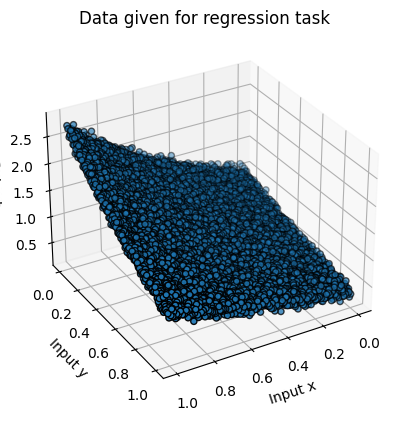

In [69]:
ax = plt.axes(projection='3d')
ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
ax.set_title('Data given for regression task')
plt.show()

In [70]:
train, valid, test = train_test_split(data)
train.shape, valid.shape, test.shape

((6120, 3), (2040, 3), (2041, 3))

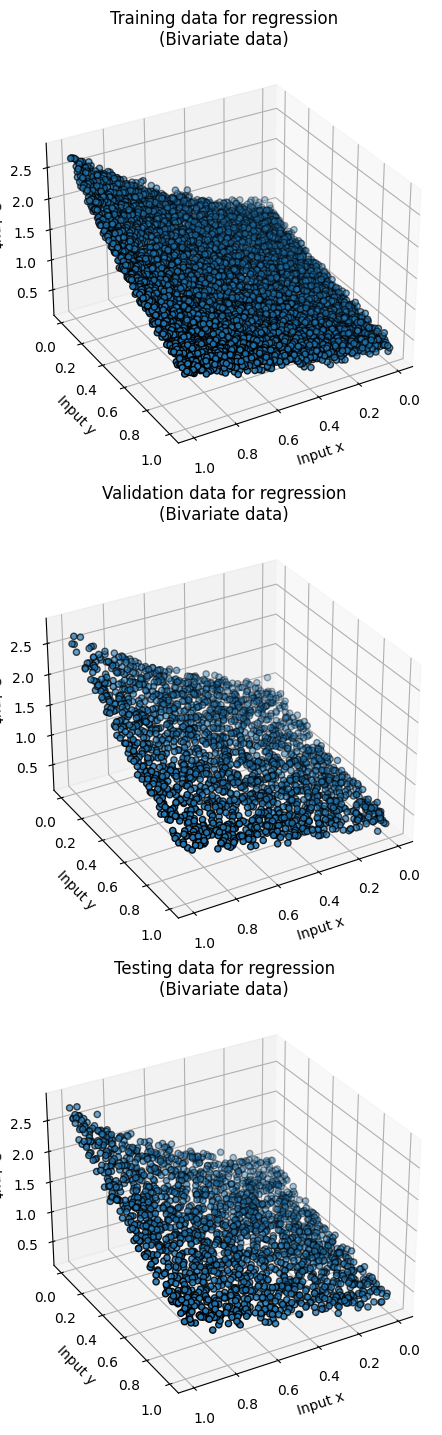

In [71]:
plt.figure()
ax = plt.subplot(3,1,1, projection='3d')
ax.scatter(train[:, 0], train[:, 1], train[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Training data for regression\n(Bivariate data)')

ax = plt.subplot(3,1,2, projection='3d')
ax.scatter(valid[:, 0], valid[:, 1], valid[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Validation data for regression\n(Bivariate data)')

ax = plt.subplot(3,1,3, projection='3d')
ax.scatter(test[:, 0], test[:, 1], test[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Testing data for regression\n(Bivariate data)')

plt.tight_layout(rect=[0, 0, 1, 3])
plt.show()

# Building the regressor

In [138]:
seed = 10
np.random.seed(seed)
neta = 0.02
max_epoch = 100
regressor = fcnn(node_layers=[2, 10, 1], max_epoch=max_epoch, learning_rate=neta, output_activation='linear')
epoch_err = regressor.fit_regressor(train)

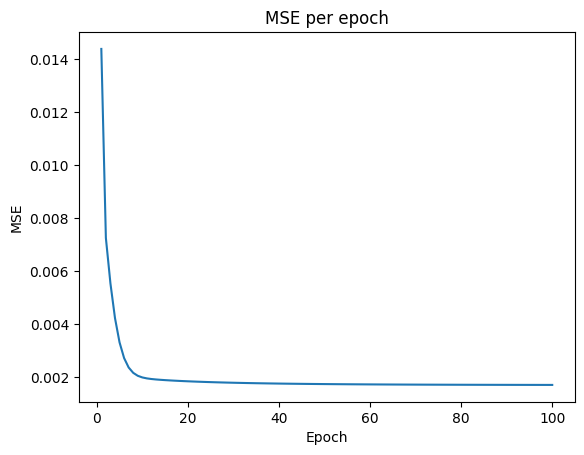

In [139]:
plt.figure()
plt.title("MSE per epoch")
plt.plot(range(1, len(epoch_err)+1), epoch_err)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [140]:
pred = []
for x in train[:, :-1]:
    pred.append(regressor.regress(x))

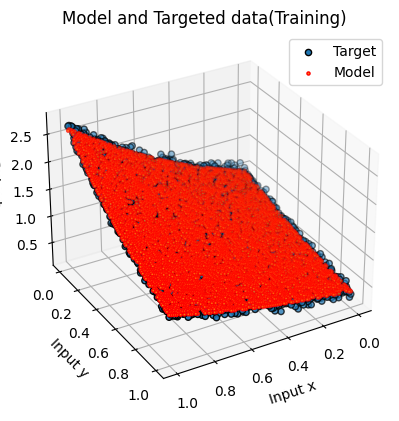

In [141]:
ax = plt.axes(projection='3d')
ax.scatter(train[:, 0], train[:, 1], train[:, 2], edgecolor='black', label='Target')
ax.scatter(train[:, 0], train[:, 1], pred, marker='.', label='Model', edgecolors='red')
plt.legend()
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Model and Targeted data(Training)')
plt.show()


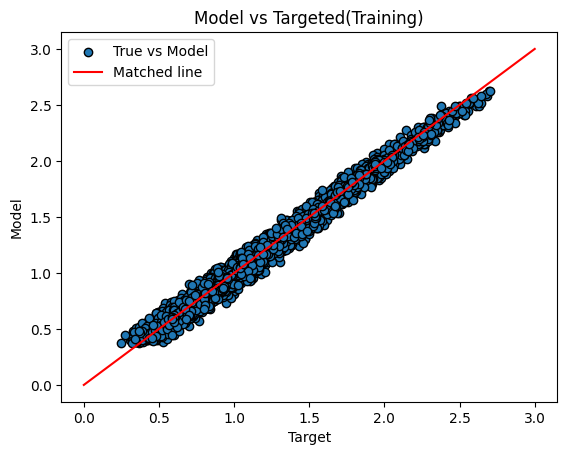

In [142]:
plt.scatter(train[:, 2], pred, label='True vs Model', edgecolors='black')
plt.plot([0,3], [0, 3], color='red', label='Matched line')
plt.title('Model vs Targeted(Training)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

In [143]:
true_output = test[:, -1:]
pred_output = []
for point in test[:, :-1]:
    pred_output.append(regressor.regress(point))

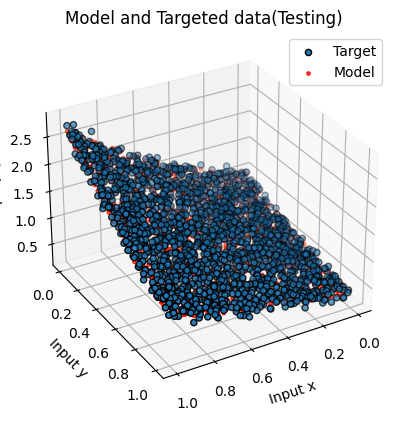

In [144]:
ax = plt.axes(projection='3d')
ax.scatter(test[:, 0], test[:, 1], test[:, 2], edgecolor='black', label='Target')
ax.scatter(test[:, 0], test[:, 1], pred_output, marker='.', label='Model', edgecolors='red')
plt.legend()
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Model and Targeted data(Testing)')
plt.show()

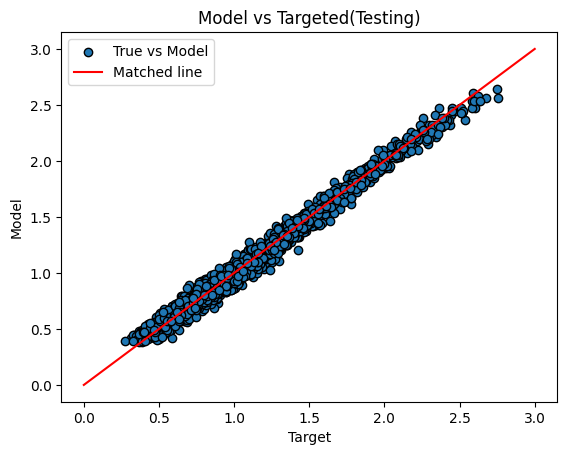

In [145]:
plt.scatter(test[:, 2], pred_output, label='True vs Model', edgecolors='black')
plt.plot([0,3], [0, 3], color='red', label='Matched line')
plt.title('Model vs Targeted(Testing)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

In [146]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(true_output, pred_output)
mse_test

0.0032926235355677257

In [147]:
train_output = train[:, -1:]
learned_output = [regressor.regress(point) for point in train[:, :-1]]
mse_train = mean_squared_error(train_output, learned_output)
mse_train

0.0033099021070471446

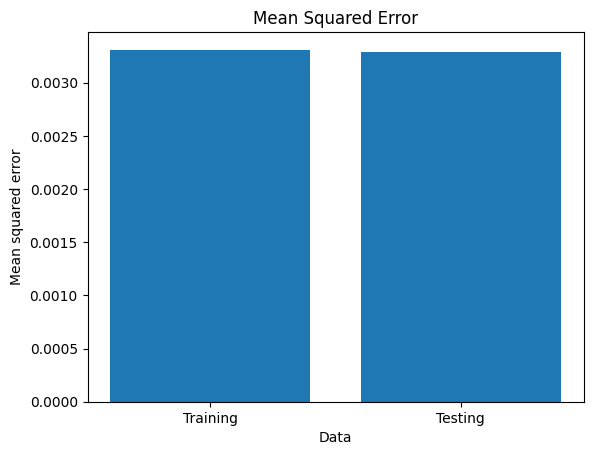

In [148]:
plt.bar(['Training', 'Testing'], [mse_train, mse_test])
plt.title('Mean Squared Error')
plt.xlabel('Data')
plt.ylabel('Mean squared error')
plt.show()